In [ ]:
#NEW ATTEMPT Below 

In [5]:
#Load data
import pandas as pd
df = pd.read_csv('../Data/jan_labelled.csv')

In [6]:
import spacy
from spacy import tokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer

# Load the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load spacy object
nlp = spacy.load('en_core_web_sm')

# Preprocess the tweets
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("amber","", temp)
    temp = re.sub("amp","", temp)
    temp = re.sub("heard","", temp)
    temp = re.sub("johnny","", temp)
    temp = re.sub("depp","", temp)
    temp = re.sub("ah","", temp)
    temp = re.sub("jd","", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

def tokenize(tweet):
    doc = nlp(tweet)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

df['cleaned_text'] = df['full_text'].apply(clean_tweet)
df['tokens'] = df['cleaned_text'].apply(tokenize)

# Add a new column to the DataFrame with the sentiment score for each tweet
df['sentiment_score'] = df['full_text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])


In [4]:
df.head()

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.statuses_count,user.url,user.verified,Johnny Depp sentiment,Amber Heard sentiment,tokens,Johnny Depp keywords,Amber Heard keywords,cleaned_text,sentiment_score
0,1.477505e+18,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,en,1.466076e+18,1.363631e+18,"[{'indices': [45, 56], 'text': 'JohnnyDepp'}]","[{'original_info': {'width': 1058, 'focus_rect...",[],[],...,27033.0,NaN,False,not mentioned,negative,"[bringing, civil, case, knows, evidence, wo, n...",[],"['@la77465262', '@melinda15199317', '#', 'john...",bringing civil case knows evidence wont stand ...,-0.9095
1,1.477504e+18,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,en,NaN,NaN,[],NaN,[],[],...,27853.0,https://t.co/dVvgQNht1k,False,not mentioned,negative,"[thing, want, leave, wonder, woman, movie, nee...",[],"['thing', 'want', 'leave', 'wonder', 'woman', ...",thing want leave alone first wonder woman movi...,-0.2263
2,1.477500e+18,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,en,1.477497e+18,1.297205e+18,[],NaN,[],[],...,199.0,NaN,False,not mentioned,positive,"[ye, snyder, nt, involved, flash, care]",[],"['@zakreckless', 'yeah', 'snyder', 'involved',...",ye snyder isnt involved flash would care,0.7096
3,1.477498e+18,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,en,1.477475e+18,3.050171e+08,[],NaN,[],[],...,2313.0,NaN,False,not mentioned,negative,"[forgot, hook, sure, find, stress]",[],"['@iimissmax', '@bg98021', '@gerberkawasaki', ...",forgot hook sure find someone stress,-0.1280
4,1.477496e+18,2022-01-02 04:26:25+00:00,I never seen Aquaman nor will I because Amber ...,en,NaN,NaN,[],NaN,[],[],...,5423.0,https://t.co/XkBVR5FDCS,False,not mentioned,neutral,"[seen, aquaman]",[],"['seen', 'aquaman', 'amber', 'heard']",never seen aquaman,0.0000


Number of Johnny Depp positive tweets: 6.86 %
Number of Johnny Depp negative tweets: 7.2 %
Number of Amber Heard positive tweets: 17.28 %
Number of Amber Heard negative tweets: 24.53 %

Number of Johnny Depp positive tweets: 954
Number of Johnny Depp negative tweets: 1001
Number of Amber Heard positive tweets: 2402
Number of Amber Heard negative tweets: 3409


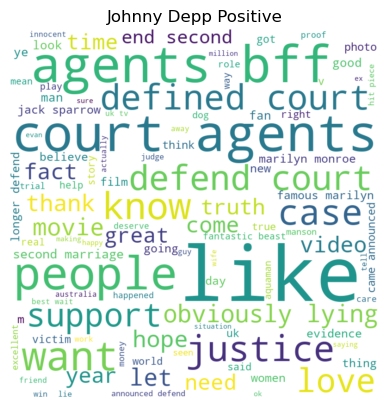

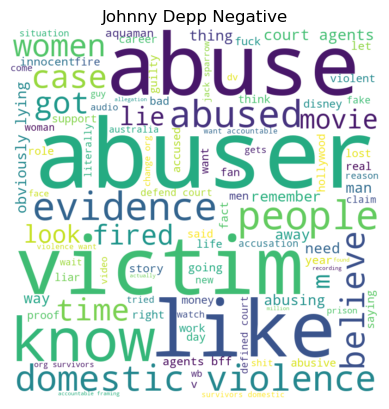

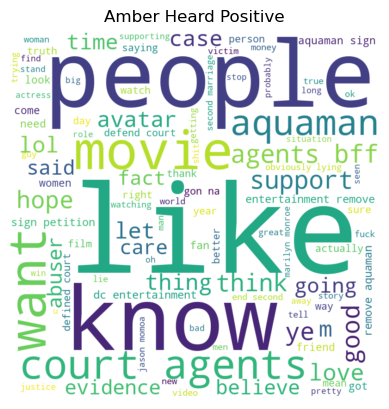

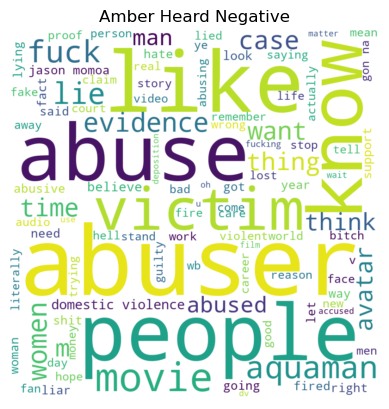

In [8]:
# Create three new DataFrames from the original DataFrame, one for each sentiment category (positive, negative, neutral)
df_jd_pos = df[(df['sentiment_score'] > 0) & (df['Johnny Depp sentiment'] == 'positive')]
df_jd_neg = df[(df['sentiment_score'] < 0) & (df['Johnny Depp sentiment'] == 'negative')]
# df_jd_neu = df[(df['sentiment_score'] == 0) & (df['Johnny Depp sentiment'] == 'neutral')]
df_ah_pos = df[(df['sentiment_score'] > 0) & (df['Amber Heard sentiment'] == 'positive')]
df_ah_neg = df[(df['sentiment_score'] < 0) & (df['Amber Heard sentiment'] == 'negative')]
# df_ah_neu = df[(df['sentiment_score'] == 0) & (df['Amber Heard sentiment'] == 'neutral')]

# Print the number of percentage of tweets in each category
print("Number of Johnny Depp positive tweets:", round((len(df_jd_pos)/len(df))*100,2), "%")
print("Number of Johnny Depp negative tweets:", round((len(df_jd_neg)/len(df))*100,2),"%")
# print("Number of Johnny Depp neutral tweets:", round((len(df_jd_neu)/len(df))*100,2),"%")
print("Number of Amber Heard positive tweets:", round((len(df_ah_pos)/len(df))*100,2),"%")
print("Number of Amber Heard negative tweets:", round((len(df_ah_neg)/len(df))*100,2),"%")
# print("Number of Amber Heard neutral tweets:", round((len(df_ah_neu)/len(df))*100,2),"%")

print("")

# Print the number of tweets in each category
print("Number of Johnny Depp positive tweets:", len(df_jd_pos))
print("Number of Johnny Depp negative tweets:", len(df_jd_neg))
# print("Number of Johnny Depp neutral tweets:", len(df_jd_neu))
print("Number of Amber Heard positive tweets:", len(df_ah_pos))
print("Number of Amber Heard negative tweets:", len(df_ah_neg))
# print("Number of Amber Heard neutral tweets:", len(df_ah_neu))

# Generate word clouds for each sentiment category
stopwords_2= set(["n","t","nt","s"])
wordcloud_jd_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_pos['tokens'].sum()))
plt.imshow(wordcloud_jd_pos, interpolation='bilinear')
plt.title("Johnny Depp Positive")
plt.axis("off")
plt.show()

wordcloud_jd_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neg['tokens'].sum()))
plt.imshow(wordcloud_jd_neg, interpolation='bilinear')
plt.title("Johnny Depp Negative")
plt.axis("off")
plt.show()

# wordcloud_jd_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neu['tokens'].sum()))
# plt.imshow(wordcloud_jd_neu, interpolation='bilinear')
# plt.title("Johnny Depp Neutral")
# plt.axis("off")
# plt.show()

wordcloud_ah_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_pos['tokens'].sum()))
plt.imshow(wordcloud_ah_pos, interpolation='bilinear')
plt.title("Amber Heard Positive")
plt.axis("off")
plt.show()

wordcloud_ah_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neg['tokens'].sum()))
plt.imshow(wordcloud_ah_neg, interpolation='bilinear')
plt.title("Amber Heard Negative")
plt.axis("off")
plt.show()

# wordcloud_ah_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neu['tokens'].sum()))
# plt.imshow(wordcloud_ah_neu, interpolation='bilinear')
# plt.title("Amber Heard Neutral")
# plt.axis("off")
# plt.show()